In [13]:
from image_matching.sigle_channel_image import single_channel_image, moravec
import matplotlib.pyplot as plt


threshold = 23000
window = 5
left = single_channel_image("data/left.tif")


3


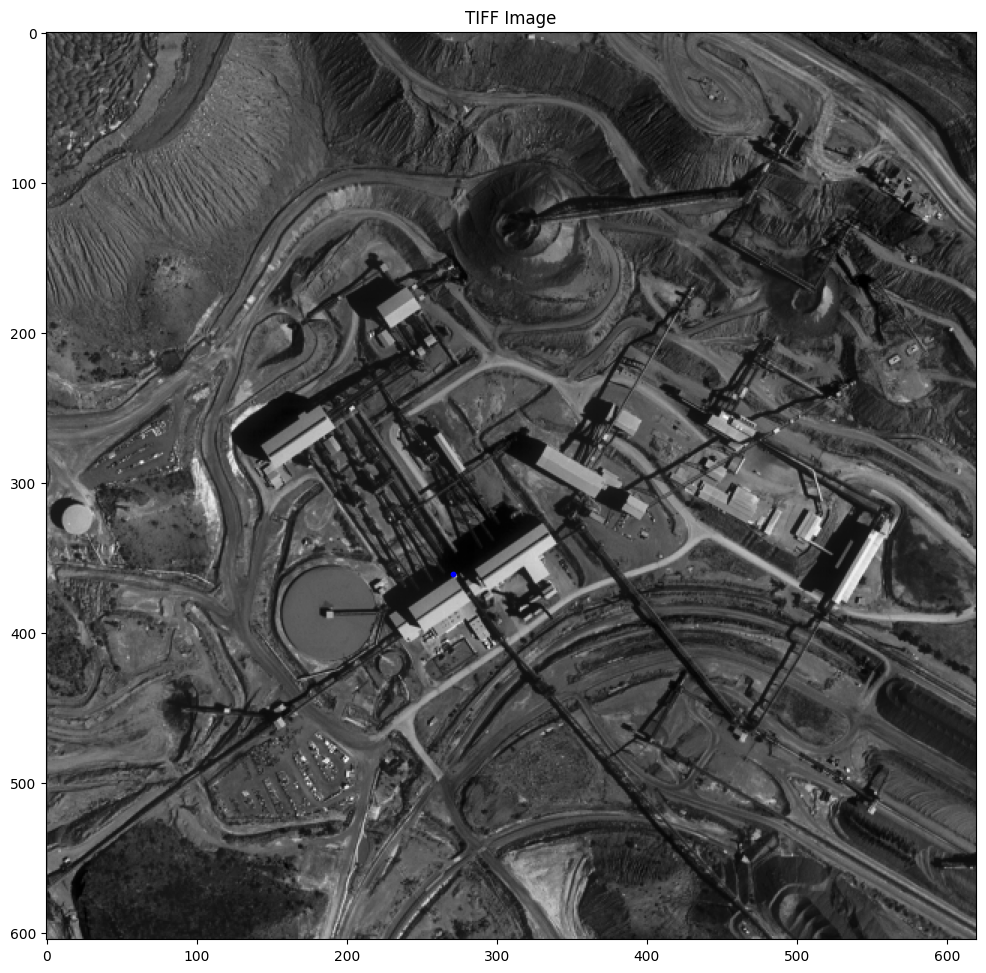

In [19]:
x = 271
y = 361
print(left.moravec(x, y))
plt.figure(figsize=(12, 12))
plt.imshow(left.data, cmap='gray') 
plt.scatter(x, y, color='blue', s=10, marker='o')
plt.title('TIFF Image')
plt.show()

In [12]:
import numpy as np

band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)
band4 = dataset.GetRasterBand(4)
data_array1 = band1.ReadAsArray()
data_array2 = band4.ReadAsArray()

np.array_equal(data_array1, data_array2)



False

In [9]:
print(f"Size is {dataset.RasterXSize} x {dataset.RasterYSize} x {dataset.RasterCount}")
data_array.shape
data_array[:, 0]

Size is 620 x 605 x 4


array([ 42,  41,  34,  34,  39,  63,  76,  75,  68,  64,  60,  53,  57,
        66,  76,  56,  47,  53,  53,  40,  55,  64,  47,  47,  52,  41,
        30,  25,  29,  33,  40,  44,  45,  56,  55,  47,  51,  56,  57,
        59,  57,  62,  63,  59,  50,  48,  43,  54,  58,  57,  52,  63,
        67,  72,  53,  65,  67,  60,  32,  35,  48,  54,  37,  33,  46,
        47,  50,  48,  48,  48,  63,  82,  57,  76,  84, 108,  43,  27,
        34,  52,  55,  42,  46,  45,  39,  47,  53,  57,  40,  45,  52,
        41,  52,  68,  93,  86,  81,  81,  80,  87,  73,  78,  73,  76,
        66,  58,  57,  66,  72,  81,  90,  63,  71,  87, 101, 104,  92,
        75,  90, 122, 101,  92,  88,  89,  84,  87,  84,  83,  71,  86,
        90,  88,  83, 100, 111, 115, 103,  89,  78,  54,  77,  96,  93,
        82,  87,  96,  88,  83,  87,  84,  71,  64,  62,  64,  60,  64,
        54,  66,  69,  50,  25,  29,  53,  63,  74,  82,  96,  84,  62,
        69,  86,  82,  80,  73,  87,  94,  97,  96,  83,  80,  8